# **AULA PRÁTICA:**
# Análise de Dados de Metagenômica

# Google Colab

O **Google Colab ou Google Colaboratory** é uma plataforma baseada em nuvem hospedada pelo Google Research que permite para qualquer pessoa escrever e executar código Python em um ambiente de caderno (notebook) através do navegador.

Uma característica importante é que o Colab não requer configuração para uso, ao mesmo tempo em que fornece acesso gratuito a recursos de computação, incluindo GPUs, para incentivar pesquisas em aprendizagem de máquina, análise de dados e educação.

No Google Colab, você também pode executar **comandos Bash** diretamente nas células do notebook adicionando um ponto de exclamação (!) antes do comando, como exemplo o uso do 'ls' para listar diretórios: `!ls`. Como exceção do uso da exclamação, para mudar o diretório utilizando comando Bash, deve-se adicionar o sinal de porcentagem (%) antes do comando 'cd': `%cd`.

Para executar múltiplas linhas de comando Bash em sequência, você pode utilizar células de código com o comando '%%bash' no início, permitindo que você escreva um script Bash diretamente na célula:

```
%%bash

cd $HOME/analysis
cat text.csv | awk -F, '{print $2}' > text2.csv
```

# Conda/Mamba

O **Conda** é um sistema de gerenciamento de pacotes e ambientes que permite a instalação, execução e atualização de pacotes, sendo amplamente utilizado na comunidade científica e de análise de dados para gerenciar bibliotecas e ambientes isolados de Python e R.

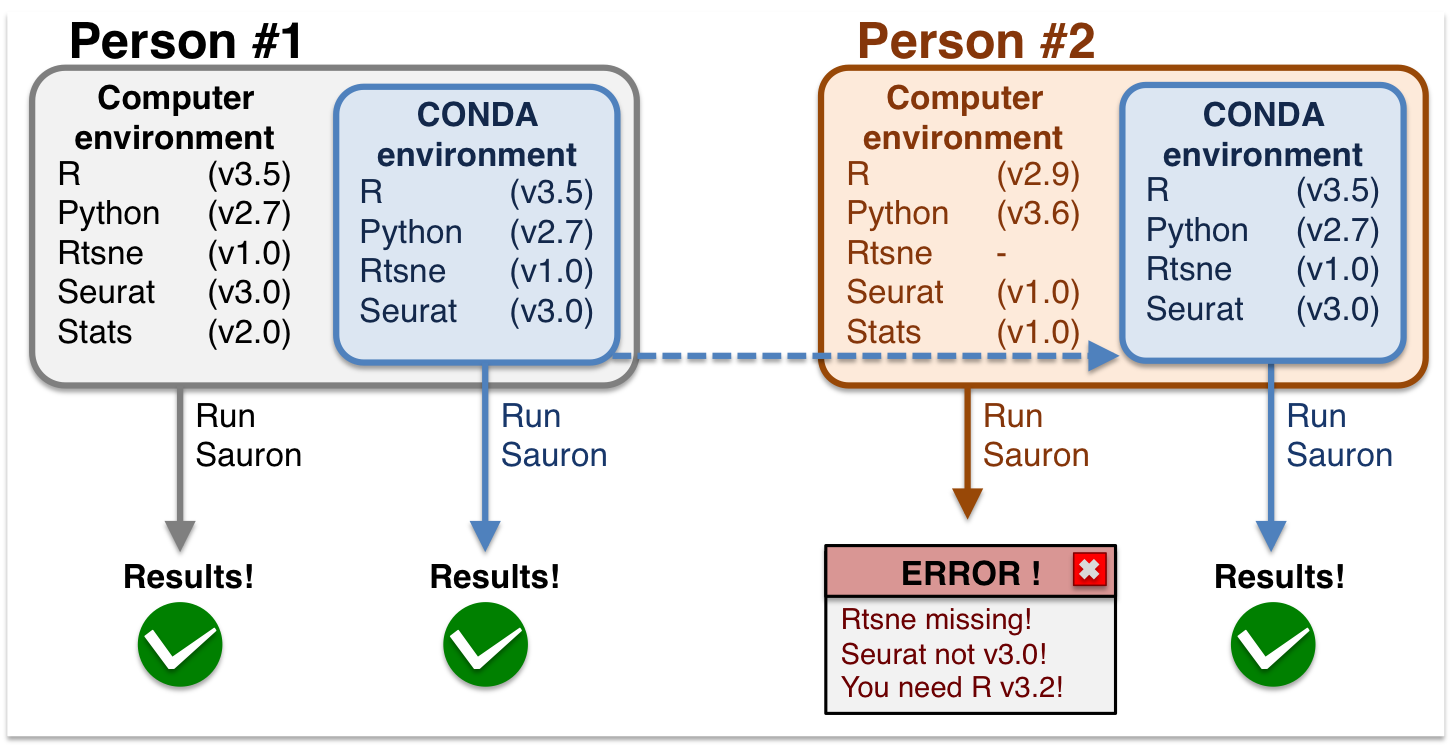

O **Mamba** e **Micromamba** são implementações mais rápidas e leves do Conda, com o Mamba sendo uma versão completa enquanto o Micromamba é uma versão minimalista, ambos projetados para oferecer melhor desempenho e eficiência na resolução de pacotes e na criação de ambientes, especialmente em sistemas com recursos limitados.

# Pacotes e dependências para análises de metagenômica

Na metagenômica, existem diversas abordagens e métodos para analisar conjuntos complexos de dados. Neste Notebook será apresentado um conjunto enxuto de ferramentas e scripts para uma análise de metagenômica exploratória e simplificada para execução em uma aula prática.

Muitas outras ferramentas e técnicas podem ser relevantes, dependendo dos objetivos específicos e da natureza dos seus dados metagenômicos.

* [SRA Tools](https://github.com/ncbi/sra-tools): conjunto de utilitários para acessar sequências do Sequence Read Archive (SRA) da NCBI, facilitando a importação de dados de metagenômica.
    * fastq-dump: ferramenta do pacote SRA Tools que converte dados do SRA em formatos de sequência padrão como FASTQ.

* [Kraken2](https://ccb.jhu.edu/software/kraken2/index.shtml): ferramenta rápida de classificação de sequência que atribui rótulos taxonômicos a leituras de DNA metagenômico com alta precisão.
    * *k2_viral_20231009*: banco de dados viral pré-construído disponibilizado pelo [laboratório de Benjamin Langmead](https://benlangmead.github.io/aws-indexes/k2), otimizado para uso com o Kraken2 e que permite a classificação taxonômica de sequências virais.

* [Krona](https://github.com/marbl/Krona/wiki): ferramenta para gerar visualizações interativas de hierarquias que permite a exploração de taxonomias e metadados associados a conjuntos de dados metagenômicos.

* [KrakenTools](https://ccb.jhu.edu/software/krakentools/): coleção de scripts auxiliares para aprimorar a funcionalidade do Kraken2, como a filtragem e o manejo de relatórios.
    * *kreport2krona.py*: script que converte relatórios do Kraken2 em formatos compatíveis com o Krona, facilitando a visualização taxonômica.
    * *ktImportText*: função do Krona que importa dados de texto e os integra em visualizações interativas, melhorando a interpretação dos resultados metagenômicos.

# Salvar uma cópia do notebook da aula prática

Antes de continuar, vamos **salvar uma cópia deste notebook** no Google Drive:

1. Clique em `Arquivo`, no canto superior esquerdo (em inglês, `File`).
2. Selecione `Salvar uma cópia no Drive` (em inglês `Save a copy in Drive`).

# Execução da análise de dados de metagenômica

In [ ]:
# Checar a versão do Python instalada na máquina virtual do Google Colab

!python --version

In [ ]:
# Instalar o Conda/Mamba utilizando o instalador de bibliotecas do Python (pip)

!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
# Listar ambientes existentes do Conda/Mamba

!mamba env list

In [ ]:
# Criar ambiente "metagenomica" para análises de metagenômica

!mamba create -n metagenomica

In [ ]:
# Listar ambientes existentes do Conda/Mamba

!mamba env list

In [ ]:
# Ativar ambiente "metagenomica"

!mamba activate metagenomica

In [ ]:
# Instalar SRA Tools no ambiente "metagenomica"

!mamba install -c bioconda sra-tools

In [ ]:
# Instalar o Kraken2

%%bash

wget https://github.com/DerrickWood/kraken2/archive/refs/tags/v2.1.3.tar.gz
tar -xvf v2.1.3.tar.gz
cd kraken2-2.1.3
bash install_kraken2.sh ../kraken2
cd ../

In [ ]:
# Baixar uma base taxonômica de sequências virais

%%bash

mkdir k2_viral_20231009
cd k2_viral_20231009
wget https://genome-idx.s3.amazonaws.com/kraken/k2_viral_20231009.tar.gz
tar -xvf k2_viral_20231009.tar.gz
cd ../

In [ ]:
# Baixar KrakenTools

!git clone https://github.com/jenniferlu717/KrakenTools

In [ ]:
# Instalar Krona

%%bash

git clone https://github.com/marbl/Krona
cd Krona/KronaTools/
mkdir -p taxonomy
perl install.pl
cd ../../

In [ ]:
# Gerar relatório taxonômico de uma amostra de sequenciamento
# Você pode navegar pelo NCBI SRA (https://www.ncbi.nlm.nih.gov/sra) e escolher outra amostra (ID Run)

AMOSTRA="ERR11447892" # Trocar por outro ID, como exemplo SRR26082548

!fastq-dump --split-3 "$AMOSTRA"
!kraken2/kraken2 --db k2_viral_20231009 --report "$AMOSTRA".kreport --paired "$AMOSTRA"_1.fastq "$AMOSTRA"_2.fastq > "$AMOSTRA".kraken
!python KrakenTools/kreport2krona.py -r "$AMOSTRA".kreport -o "$AMOSTRA".krona
!ktImportText "$AMOSTRA".krona -o "$AMOSTRA".krona.html

from google.colab import files
files.download(f'{AMOSTRA}.krona.html')